# Support Vector Machines Method

#### - Danial Hawari [ lida1018 ] [ 67252 ]
#### - Kai Li Ong  [ onka1012 ] [ 67254 ]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pathlib

In [2]:
# main_project_path = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods\dataset"
main_project_path = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods\dataset"
#savepath = r"C:\Users\danny\OneDrive - bwedu\EU4M MASTER SUBJECTS\SEMESTER 2\Kuenstliche Intelligenz\AI\ImageClassificationMethods\"
savepath = r"C:\Users\KylieOng\Documents\GitHub\ImageClassificationMethods"
data_dir = pathlib.Path(main_project_path)

800
Accuracy:  68.75
Prediction:  Kamm


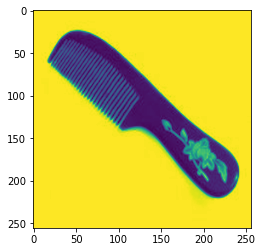

In [3]:

categories = ['Buerste','Kamm']
data = []

for category in categories:
 new_path = os.path.join(data_dir,category)
 label = categories.index(category)

 for img in os.listdir(new_path):
   imgpath = os.path.join(new_path,img)
   imgtool = cv2.imread(imgpath,0)  #read image in grayscale mode
   
   try:
     imgtool = cv2.resize(imgtool,(256,256)) #resize image into 256 x 256 pixel
     image = np.array(imgtool).flatten() #convert image into 1D mode
     data.append([image,label])
   except Exception as e:
    pass

print(len(data))

pick_insert = open(savepath + "\data.pickle",'wb')
pickle.dump(data, pick_insert)
pick_insert.close()

pick_read = open(savepath + "\data.pickle",'rb')
data = pickle.load(pick_read)
pick_read.close()

features = []
labels = []

for feature ,label in data:
  features.append(feature)
  labels.append(label)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.50)
model = SVC( C = 1, kernel = 'poly', gamma = 'auto')
model.fit(xtrain, ytrain)

"""
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.98)
model = SVC( C = 1, kernel = 'poly', gamma = 'auto')
model.fit(xtrain, ytrain)

pick_new_insert = open(savepath + "\model_98.sav",'wb')
pickle.dump(model, pick_new_insert)
pick_new_insert.close()

pick_new_insert = open(savepath + "\model_98.sav",'wb')
pickle.dump(model, pick_new_insert)
pick_new_insert.close()

"""

pick_new_insert = open(savepath + "\model_50.sav",'wb')
pickle.dump(model, pick_new_insert)
pick_new_insert.close()

pick_new_read = open(savepath + "\model_50.sav",'rb')
model = pickle.load(pick_new_read)
pick_new_read.close()

prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)*100

categories = ['Buerste','Kamm']

print("Accuracy: ", accuracy)
print("Prediction: ", categories[prediction[0]])

image = xtest[0].reshape(256,256)
plt.imshow(image)
plt.show()
#"""
